### Calling nba.com/stats API to get Data

In [ ]:
# Importing the necessary libraries
import requests
import pandas as pd

# Under the Header tab, select general and copy the first part of the request URL
url = 'https://stats.nba.com/stats/leaguedashplayerstats?'

# Header tab, under “Request Headers” subsection
header = {
"Accept" : "application/json, text/plain, */*",
"Accept-Encoding": "gzip, deflate, br",
"Accept-Language": "en-US,en;q=0.9",
"Connection": "keep-alive",
"Host": "stats.nba.com",
"Origin": "https://www.nba.com",
"Referer": "https://www.nba.com/",
"Sec-Fetch-Dest": "empty",
"Sec-Fetch-Mode": "cors",
"Sec-Fetch-Site": "same-site",
"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36",
"x-nba-stats-origin": "stats",
"x-nba-stats-token": "true"}


#Header Tab, under "Query String Parameter" subsection
params = (
("College", ""),
("Conference", ""),
("Country", ""),
("DateFrom", ""),
("DateTo", ""),
("Division", ""),
("DraftPick", ""),
("DraftYear", ""),
("GameScope", ""),
("GameSegment", ""),
("Height",""),
("LastNGames", "0"),
("LeagueID", "00"),
("Location", ""),
("MeasureType", "Base"),
("Month", "0"),
("OpponentTeamID", "0"),
("Outcome", ""),
("PORound", "0"),
("PaceAdjust", "N"),
("PerMode", "PerGame"),
("Period", "0"),
("PlayerExperience", ""),
("PlayerPosition", ""),
("PlusMinus", "N"),
("Rank", "N"),
("Season", "2021-22"),
("SeasonSegment", ""),
("SeasonType", "Regular Season"),
("ShotClockRange", ""),
("StarterBench", ""),
("TeamID", "0"),
("TwoWay", "0"),
("VsConference", ""),
("VsDivision", ""),
("Weight", ""))

#Using Request library to get the data
response = requests.get(url, headers=header, params=params)
response_json = response.json()
players_stats = pd.DataFrame(response_json['resultSets'][0]['rowSet'])
players_stats.columns = response_json['resultSets'][0]['headers']
players_stats.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,Aaron,1610612743,DEN,26.0,59,36,23,0.610,...,78,201,89,93,37,102,93,34,5,"203932,1610612743"
1,1630565,Aaron Henry,Aaron,1610612755,PHI,22.0,6,6,0,1.000,...,278,544,543,563,489,579,232,34,5,"1630565,1610612755"
2,1628988,Aaron Holiday,Aaron,1610612756,PHX,25.0,49,24,25,0.490,...,346,325,292,298,362,326,232,34,5,"1628988,1610612756"
3,1630174,Aaron Nesmith,Aaron,1610612738,BOS,22.0,45,27,18,0.600,...,508,393,455,440,212,465,232,34,5,"1630174,1610612738"
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,23.0,38,10,28,0.263,...,302,192,298,272,469,295,232,34,5,"1630598,1610612760"


### Checking Completeness of Data

In [1]:
import missingno as msno
%matplotlib inline
msno.bar(players_stats)

NameError: ignored

### Data is Complete

### Now Need to Add the "Salary" Column and "Year of Contract" Column

### Scraping Data from Basketball Reference

In [ ]:
# needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
# URL to scrape
url = "https://www.basketball-reference.com/contracts/players.html"

In [ ]:
# collect HTML data
html = urlopen(url)
        
# create beautiful soup object from HTML
soup = BeautifulSoup(html, features="lxml")

In [ ]:
# use getText()to extract the headers into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]

In [ ]:
# get rows from table
rows = soup.findAll('tr')[2:]
rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

In [ ]:
# we're missing a column for years
# add the years into rows_data
rank = 1
for i in range(0, len(rows_data)):
    rows_data[i].insert(0, rank)
    rank +=1

In [ ]:
# create the dataframe
players_salary = pd.DataFrame(rows_data, columns = headers)
players_salary = players_salary.rename({"Player": "PLAYER_NAME"}, axis='columns')
display(players_salary)


,Rk,PLAYER_NAME,Tm,2021-22,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,"$45,780,966","$48,070,014","$51,915,615","$55,761,216","$59,606,817",,Bird Rights,"$261,134,628"
1,2,John Wall,HOU,"$44,310,840","$47,366,760",,,,,Bird Rights,"$44,310,840"
2,3,Russell Westbrook,LAL,"$44,211,146","$47,063,478",,,,,Bird Rights,"$44,211,146"
3,4,James Harden,PHI,"$43,848,000","$46,872,000",,,,,Bird Rights,"$43,848,000"
4,5,LeBron James,LAL,"$41,180,544","$44,474,988",,,,,Bird,"$85,655,532"
...,...,...,...,...,...,...,...,...,...,...,...
619,620,Brandon Williams,POR,,,,,,,,"$53,176"
620,621,Xavier Sneed,MEM,"$1,563,518",,,,,,,"$53,176"
621,622,Moses Wright,LAC,,,,,,,,"$53,176"
622,623,Malcolm Hill,CHI,,,,,,,,"$53,176"


In [ ]:
players_salary["Signed Using"].value_counts()


                       155
1st Round Pick         118
Minimum Salary          80
Bird                    41
MLE                     40
Cap Space               29
Bird Rights             25
Sign and Trade          20
Early Bird              16
1st Round pick          11
Non Bird                 8
Mini MLE                 8
Cap space                6
Room Exception           5
Bi-Annual Exception      3
Early Bird Rights        2
1st round pick           1
Name: Signed Using, dtype: int64

remove first round pick.
keep min salary.
keep bird.
keep bird. 
keep mle


In [ ]:
players_salary.drop(players_salary.index[players_salary["Signed Using"] == "1st Round Pick"], inplace=True)
players_salary.drop(players_salary.index[players_salary["Signed Using"] == "1st round pick"], inplace=True)
players_salary.drop(players_salary.index[players_salary["Signed Using"] == "1st Round pick"], inplace=True)
display(players_salary)

,Rk,PLAYER_NAME,Tm,2021-22,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,"$45,780,966","$48,070,014","$51,915,615","$55,761,216","$59,606,817",,Bird Rights,"$261,134,628"
1,2,John Wall,HOU,"$44,310,840","$47,366,760",,,,,Bird Rights,"$44,310,840"
2,3,Russell Westbrook,LAL,"$44,211,146","$47,063,478",,,,,Bird Rights,"$44,211,146"
3,4,James Harden,PHI,"$43,848,000","$46,872,000",,,,,Bird Rights,"$43,848,000"
4,5,LeBron James,LAL,"$41,180,544","$44,474,988",,,,,Bird,"$85,655,532"
...,...,...,...,...,...,...,...,...,...,...,...
619,620,Brandon Williams,POR,,,,,,,,"$53,176"
620,621,Xavier Sneed,MEM,"$1,563,518",,,,,,,"$53,176"
621,622,Moses Wright,LAC,,,,,,,,"$53,176"
622,623,Malcolm Hill,CHI,,,,,,,,"$53,176"


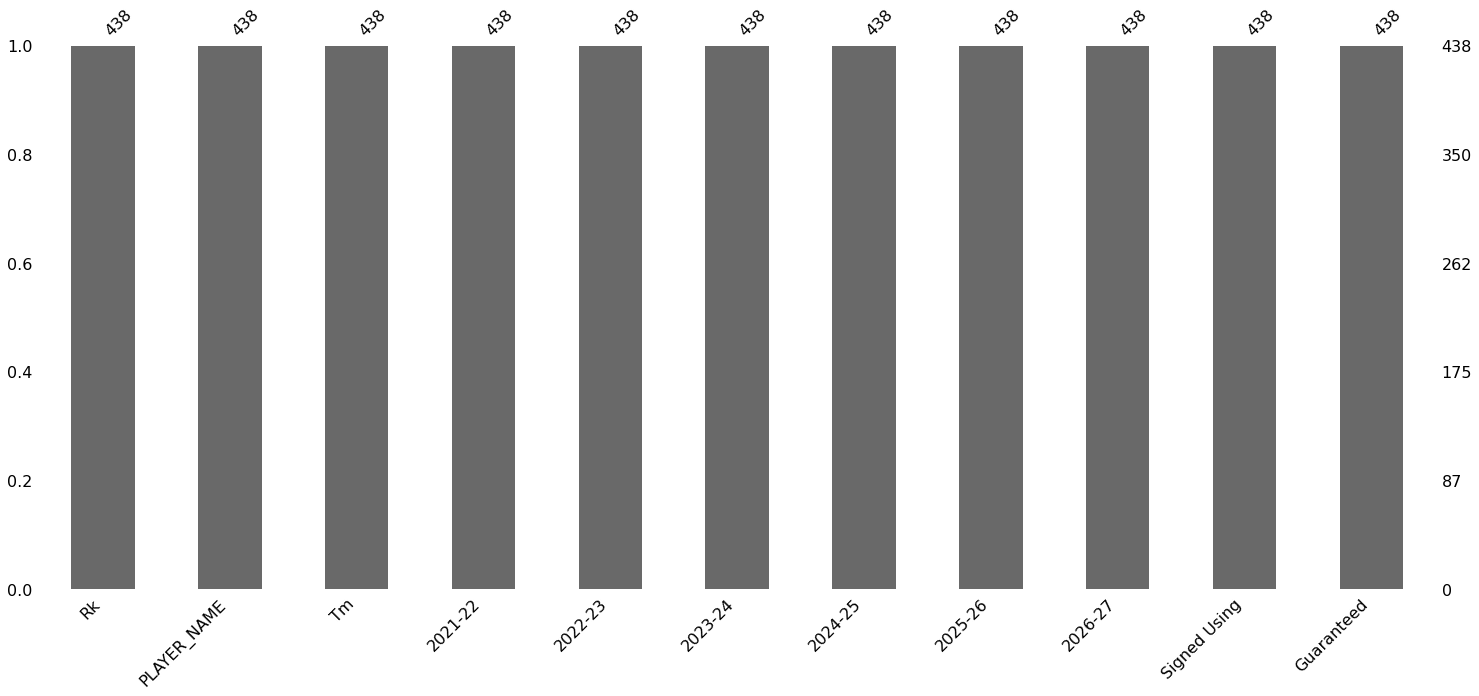

In [ ]:
#Checking Completeness
import missingno as msno
%matplotlib inline
players_salary = players_salary.dropna()
msno.bar(players_salary)

#Appears that some players are missing 

In [ ]:
import numpy as np
overall = pd.merge(players_stats,players_salary,on='PLAYER_NAME')

#Should one hot encode team abbrv, signed using. Best one hot encoding method?
overall = overall.drop(columns=["Signed Using","CFPARAMS","TEAM_ABBREVIATION",'PLAYER_ID', 'PLAYER_NAME', "NICKNAME", "TEAM_ID", "Tm", "2022-23", "2023-24", "2024-25", "2025-26", "2026-27"])
overall = overall.dropna()
#overall = np.array(overall, dtype=np.float)
overall['Guaranteed'] = overall['Guaranteed'].str[1:]
overall['Guaranteed'] = overall['Guaranteed'].replace(',','', regex=True)
overall['Guaranteed'] = pd.to_numeric(overall['Guaranteed'], downcast="float")
pd.set_option('display.expand_frame_repr', False)
overall.head()

,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,Rk,2021-22,Guaranteed
0,26.0,59,36,23,0.610,31.7,5.7,11.0,0.518,1.1,...,89,93,37,102,93,34,5,84,"$16,409,091",80207640.0
1,23.0,38,10,28,0.263,22.6,2.7,5.7,0.472,0.7,...,298,272,469,295,232,34,5,494,"$1,000,000",1000000.0
2,28.0,14,11,3,0.786,10.4,0.9,2.5,0.343,0.3,...,318,485,274,447,232,34,5,393,"$2,000,000",2000000.0
3,24.0,29,8,21,0.276,10.3,1.2,2.7,0.456,0.5,...,439,449,401,466,232,34,5,538,,300000.0
4,24.0,29,8,21,0.276,10.3,1.2,2.7,0.456,0.5,...,439,449,401,466,232,34,5,611,,169706.0


In [ ]:
my_list = overall.columns.values.tolist()
print(my_list)

['AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'CFID', 'Rk', '2021-22', 'Guaranteed']


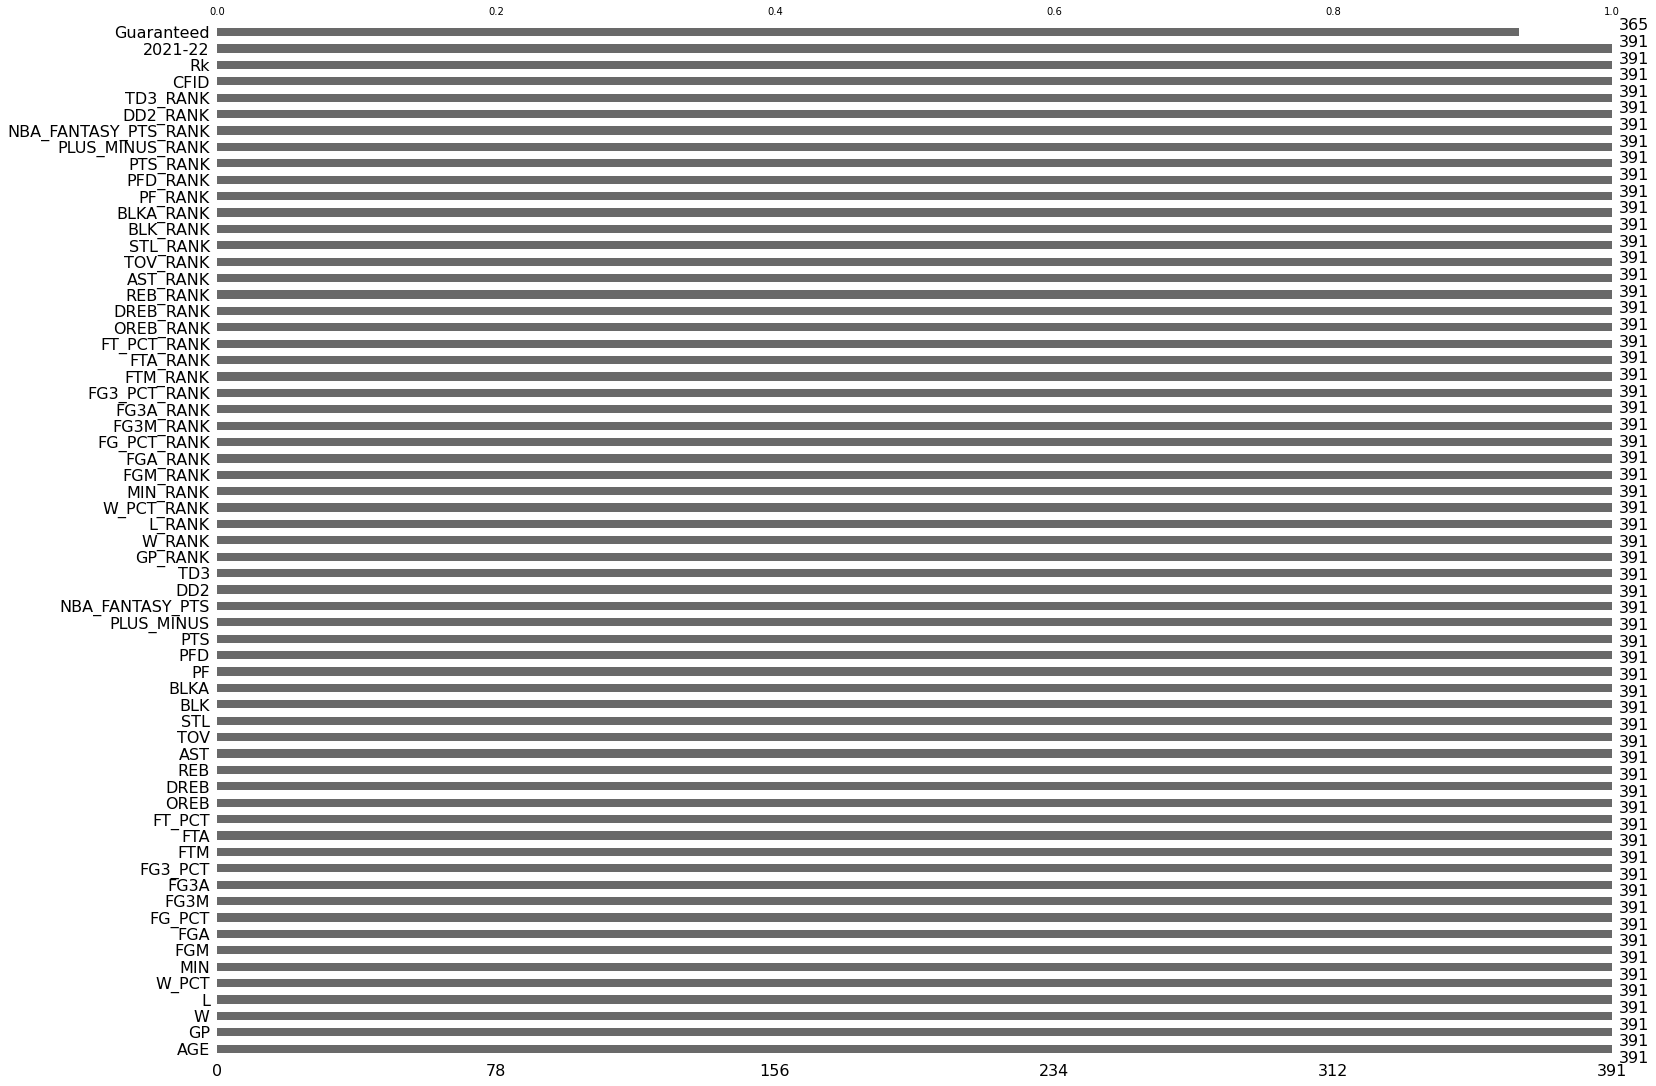

In [ ]:
%matplotlib inline
msno.bar(overall)

Basic Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [ ]:
train_dataset = overall.sample(frac=0.8, random_state=0)
test_dataset = overall.drop(train_dataset.index)

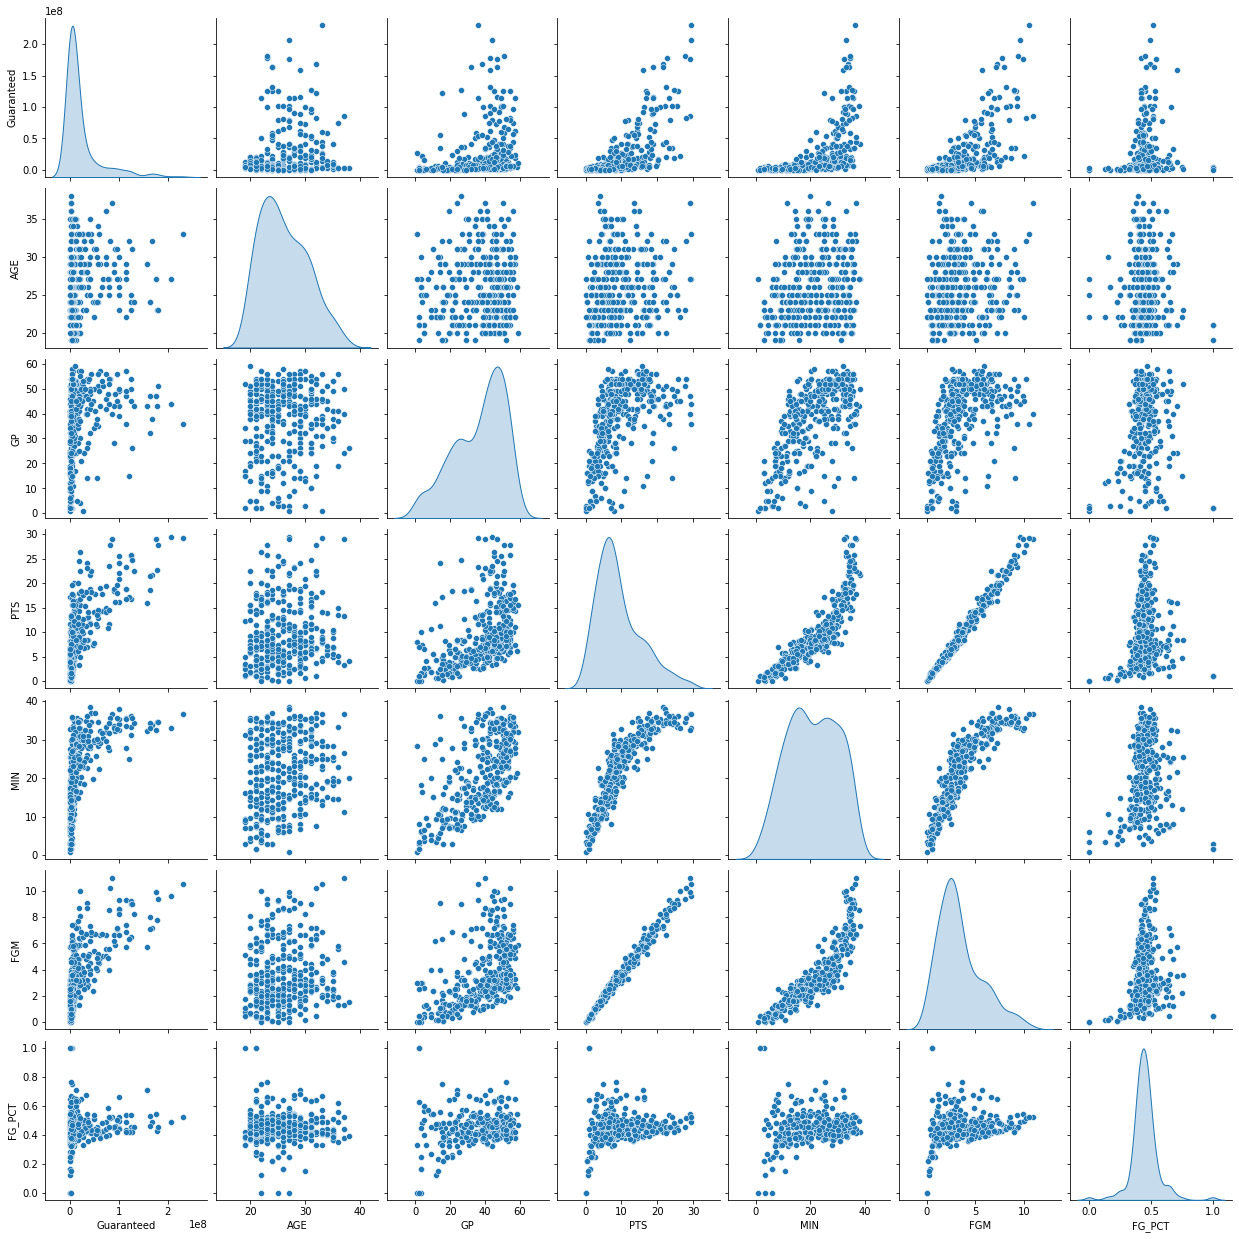

In [ ]:
sns.pairplot(train_dataset[['Guaranteed', 'AGE', 'GP', 'PTS', "MIN", "FGM", "FG_PCT"]], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,381.0,2.615223e+01,4.324706e+00,19.0,23.000,25.000,29.00,38.0
GP,381.0,3.640945e+01,1.456095e+01,1.0,25.000,40.000,48.00,59.0
W,381.0,1.807087e+01,9.460039e+00,0.0,11.000,18.000,25.00,46.0
L,381.0,1.833858e+01,9.673257e+00,0.0,12.000,18.000,24.00,46.0
W_PCT,381.0,5.046535e-01,1.824021e-01,0.0,0.389,0.521,0.63,1.0
...,...,...,...,...,...,...,...,...
DD2_RANK,381.0,1.633123e+02,6.846966e+01,3.0,114.000,219.000,219.00,219.0
TD3_RANK,381.0,3.267454e+01,5.185416e+00,3.0,34.000,34.000,34.00,34.0
CFID,381.0,5.000000e+00,0.000000e+00,5.0,5.000,5.000,5.00,5.0
Rk,381.0,2.940945e+02,1.717111e+02,3.0,149.000,291.000,444.00,583.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Guaranteed')
test_labels = test_features.pop('Guaranteed')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
AGE,2.615223e+01,4.324706e+00
GP,3.640945e+01,1.456095e+01
W,1.807087e+01,9.460039e+00
L,1.833858e+01,9.673257e+00
W_PCT,5.046535e-01,1.824021e-01
...,...,...
DD2_RANK,1.633123e+02,6.846966e+01
TD3_RANK,3.267454e+01,5.185416e+00
CFID,5.000000e+00,0.000000e+00
Rk,2.940945e+02,1.717111e+02


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)


In [ ]:
normalizer.adapt(np.array(train_features).astype('float32'))

In [ ]:
print(normalizer.mean.numpy())

[[ 26.152  36.409  18.071  18.339   0.505  20.889   3.436   7.597   0.448
    1.054   3.044   0.307   1.427   1.84    0.733   0.906   2.936   3.835
    2.075   1.152   0.67    0.426   0.431   1.75    1.689   9.346  -0.176
   19.202   2.745   0.155 245.942 246.564 239.984 285.696 253.512 251.249
  251.163 277.583 250.871 257.423 266.514 251.932 253.207 262.837 266.462
  253.969 255.612 255.953 255.115 255.722 256.171 259.549 255.197 250.921
  250.478 284.108 249.84  163.312  32.675   5.    294.094]]


In [ ]:
first = np.array(train_features[:1]).astype('float32')

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 21.    44.    13.    31.     0.29  23.     2.7    6.6    0.4    1.1
    3.4    0.33   0.7    1.     0.71   1.6    4.2    5.8    1.     0.8
    0.6    0.3    0.5    1.7    1.     7.1   -5.3   17.6    3.     0.
  190.   321.    45.   492.   208.   270.   224.   401.   180.   186.
  255.   332.   328.   344.    74.    99.    78.   334.   293.   248.
  241.   144.   261.   331.   270.   551.   232.   100.    34.     5.
  392.  ]]

Normalized: [[-1.19  0.52 -0.54  1.31 -1.15  0.23 -0.32 -0.2  -0.44  0.05  0.15  0.2
  -0.53 -0.51 -0.11  0.96  0.72  0.86 -0.58 -0.41 -0.17 -0.31  0.21 -0.07
  -0.51 -0.35 -1.63 -0.15  0.04 -0.19 -0.38  0.52 -1.29  1.29 -0.29  0.12
  -0.18  0.83 -0.47 -0.44 -0.08  0.52  0.49  0.56 -1.25 -1.   -1.15  0.5
   0.24 -0.05 -0.1  -0.74  0.04  0.52  0.13  1.61 -0.12 -0.93  0.26  0.
   0.57]]


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 61)               123       
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                3968      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,316
Trainable params: 8,193
Non-trainable params: 123
_________________________________________________________________


In [ ]:
train_features

,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,Rk
233,21.0,44,13,31,0.295,23.0,2.7,6.6,0.401,1.1,3.4,0.333,0.7,1.0,0.714,1.6,4.2,5.8,1.0,0.8,0.6,0.3,0.5,1.7,1.0,7.1,-5.3,17.6,3,0,190,321,45,492,208,270,224,401,180,186,255,332,328,344,74,99,78,334,293,248,241,144,261,331,270,551,232,100,34,5,392
159,25.0,48,32,16,0.667,24.0,3.4,7.8,0.432,1.9,4.9,0.391,0.7,0.9,0.814,0.4,1.6,2.0,3.3,1.5,1.0,0.3,0.3,2.4,1.5,9.4,2.0,18.9,0,0,128,39,276,99,197,195,180,311,84,107,112,313,338,185,407,371,390,94,116,105,314,341,87,212,184,130,216,219,34,5,453
306,37.0,40,20,20,0.500,36.7,11.0,21.1,0.520,2.8,7.9,0.352,4.3,5.7,0.746,1.1,6.8,7.9,6.5,3.2,1.6,1.0,0.8,2.3,5.3,29.0,-0.9,52.7,15,4,248,213,188,281,5,1,3,106,23,19,203,25,18,305,148,23,35,21,17,20,37,48,124,14,3,324,4,32,7,5,5
352,25.0,42,15,27,0.357,29.4,4.8,9.4,0.509,1.5,4.4,0.333,1.9,2.5,0.752,1.5,5.5,7.1,1.0,1.3,0.7,2.8,0.4,2.8,2.3,12.9,-0.3,32.1,9,0,219,287,83,445,109,117,142,113,138,134,255,114,109,281,84,45,53,325,149,226,2,262,37,110,120,283,68,48,34,5,73
96,29.0,36,5,31,0.139,13.6,1.9,4.1,0.476,0.3,1.0,0.270,1.1,1.5,0.727,0.9,2.9,3.7,0.8,0.5,0.6,0.5,0.5,1.2,1.3,5.3,-1.9,13.8,0,0,290,446,45,549,383,350,363,184,408,400,398,229,226,328,202,213,216,396,429,238,145,156,381,228,346,407,313,219,34,5,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,29.0,54,34,20,0.630,27.0,3.6,7.7,0.467,2.3,5.7,0.407,0.6,0.7,0.811,0.7,3.7,4.4,1.2,0.6,0.9,0.3,0.2,1.4,0.9,10.1,-0.1,20.2,0,0,25,24,188,149,151,179,187,204,53,66,74,372,403,195,257,128,165,283,377,118,309,410,353,347,165,268,192,219,34,5,217
207,31.0,46,38,8,0.826,28.3,3.1,7.8,0.396,1.8,5.3,0.337,1.0,1.2,0.830,0.4,4.9,5.3,1.5,0.8,1.2,0.5,0.1,2.4,1.1,9.0,6.2,21.7,1,0,157,11,410,35,132,219,178,413,97,82,242,272,287,161,388,63,101,229,272,51,171,469,97,275,196,19,168,152,34,5,141
279,29.0,24,16,8,0.667,6.9,0.6,1.9,0.326,0.3,1.1,0.231,0.1,0.2,0.750,0.1,0.4,0.5,1.3,0.3,0.1,0.0,0.0,0.5,0.4,1.6,-1.5,4.1,0,0,382,277,410,99,496,511,505,512,412,395,431,509,515,282,534,555,561,276,499,501,494,500,526,470,517,381,524,219,34,5,455
227,21.0,45,16,29,0.356,16.6,3.2,5.0,0.637,0.2,0.6,0.269,1.9,2.4,0.773,1.4,2.5,3.9,0.5,0.7,0.4,0.7,0.2,2.3,2.0,8.4,-0.9,16.3,1,0,171,277,65,447,314,213,313,37,436,455,399,111,113,244,105,271,204,466,318,382,78,382,127,136,217,326,258,152,34,5,216


In [ ]:
type(train_labels[1])

numpy.float32

In [ ]:
train_features

In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 55ms/step - loss: nan - val_loss: nan
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 11/100
10/10 [==============================] - 0s 9ms/s

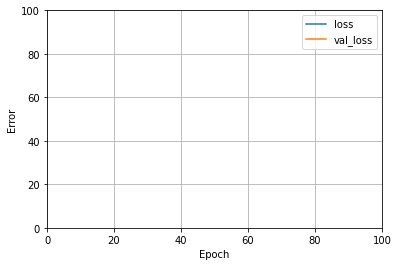

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)